In [54]:
# Setting working directory.....................................................................
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/PDS-Project-main/PDS-Project-main/data

C:\Users\Ujjwa\OneDrive\Desktop\BDA\PDS-Project-main\PDS-Project-main\data


In [49]:
#Importing Necessary Libraries....................................................................
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as lines
import seaborn as sns

In [1]:
# Setting the Theme...............................................................................
sns.set_style("whitegrid")

In [2]:
# Reading the Cleaned Data.........................................................................
data = pd.read_csv('clean_data.csv')

In [58]:
#Reading the column names........................................................................
data.columns

Index(['Unnamed: 0', 'ts', 'age', 'sex', 'work', 'phy_ff', 'phy_health',
       'phy_bw', 'phy_ex', 'meal', 'height', 'weight', 'exercise', 'fruit',
       'veg', 'cook', 'spend', 'income', 'gymtime', 'disease', 'review',
       'rate'],
      dtype='object')

In [59]:
# Plots...........................................................

In [5]:
# Data for figure 1 ............................................................................
total_male_respondents=len(data[data.sex=='Male'])
male_per = (total_male_respondents/len(data) * 100)
print(male_per)
#print(total_male_respondents)
total_female_respondents=len(data[data.sex=='Female'])
#print(total_female_respondents)
female_per = (total_female_respondents/len(data) * 100)
print(female_per)
mean_age_of_male_respondents=data[data.sex=='Male'].age.mean()
print(mean_age_of_male_respondents)
mean_age_of_female_respondents=data[data.sex=='Female'].age.mean()
print(mean_age_of_female_respondents)

65.49019607843137
34.509803921568626
22.508982035928145
22.022727272727273


Text(0.8, 50, 'Mean= 22.02')

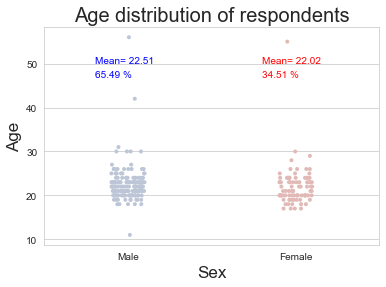

In [6]:
# Fig 1 : Age distribution of respondents....................................................
fig1 = sns.stripplot(x="sex", y="age", data=data,palette='vlag',size=4)
plt.xlabel("Sex" , fontsize=17)
plt.ylabel("Age",fontsize=17)
plt.title("Age distribution of respondents",fontsize=20)
plt.text(-0.2,47,'{:.2f} %'.format(male_per), fontsize = 10,color='blue')
plt.text(-0.2,50,'Mean= {:.2f}'.format(mean_age_of_male_respondents), fontsize = 10,color='blue')
plt.text(0.8,47,'{:.2f} %'.format(female_per), fontsize = 10,color='red')
plt.text(0.8,50,'Mean= {:.2f}'.format(mean_age_of_female_respondents), fontsize = 10,color='red')

In [7]:
#Data Used in fig 2
# For male
m_h=data[data.sex=='Male'].height
m_w=data[data.sex=='Male'].weight
m_cor=np.corrcoef(m_h,m_w)[0,1] # Correlation between height and weight
#For Female
f_h=data[data.sex=='Female'].height
f_w=data[data.sex=='Female'].weight
f_cor=np.corrcoef(f_h,f_w)[0,1] # Correlation between height and weight

Text(150, 105, 'Correlation = 0.34 ')

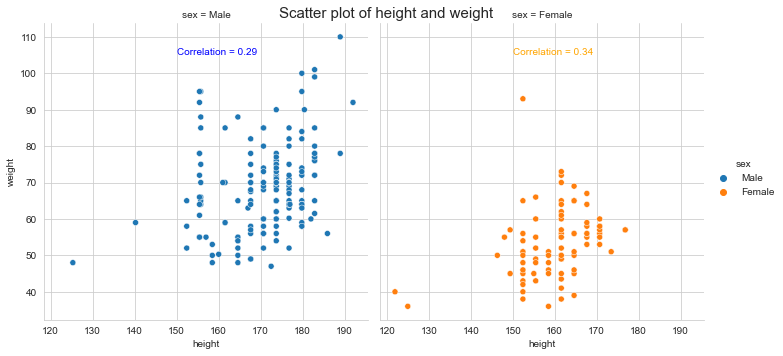

In [8]:
#Fig 2 : Scatter plot of height and weight ..........................................................
fig2 =sns.relplot(data=data,x= 'height',y='weight',col='sex',hue='sex', legend='auto')
fig2.fig.suptitle("Scatter plot of height and weight",fontsize = 15)
plt.text(70,105,'Correlation = {:.2f} '.format(m_cor), fontsize = 10,color='blue')
plt.text(150,105,'Correlation = {:.2f} '.format(f_cor), fontsize = 10,color='orange')

Text(0.5, 1.0, 'Gender Wise Work Preference vs Weight')

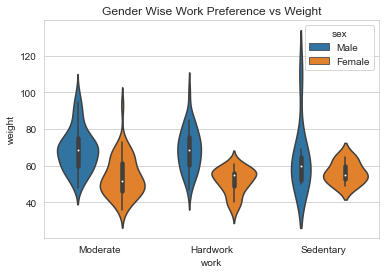

In [9]:
# Fig 3: Gender Wise Work Preference vs Weight......................................................
fig3 =sns.violinplot(data=data,x="work",y="weight",hue = "sex")
fig3.set_title('Gender Wise Work Preference vs Weight')

In [10]:
# Fig 4


Text(0.5, 1.0, 'Box Plot of Weights')

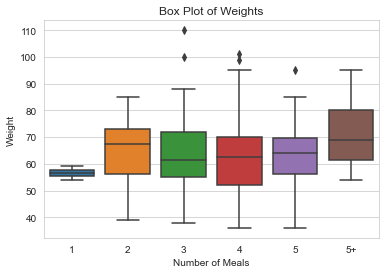

In [11]:
# fig 5 Box Plot of Weights.........................................................................
fig5 = sns.boxplot(data=data,x='meal', y='weight',order=['1','2','3','4','5','5+'])
plt.xlabel("Number of Meals")
plt.ylabel("Weight")
plt.title("Box Plot of Weights")

Text(0.5, 1.0, 'Histogram of Expenditure for fitness')

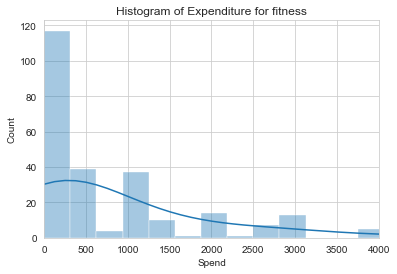

In [12]:
# fig 6 : Histogram of Expenditure for fitness.....................................................
sns.histplot(data=data, x="spend",kde=True,alpha=0.4)
plt.xlim([0, 4000])
plt.xlabel("Spend")
plt.title("Histogram of Expenditure for fitness")

In [13]:
# Data for Fig 7.1
exercises_freq=data.exercise.str.split(',\s+',expand=True).stack().value_counts()
#print(exercises_freq)
# Adding Not interseted and Do not interested to not interested
exercises_freq.loc['Not interested'] += exercises_freq.loc['Do not interested'] 
# Dropping Do not interested as it is added to Not interested
exercises_freq.drop(['Do not interested'], inplace=True)
# print(exercises_freq)

Text(0, 0.5, ' ')

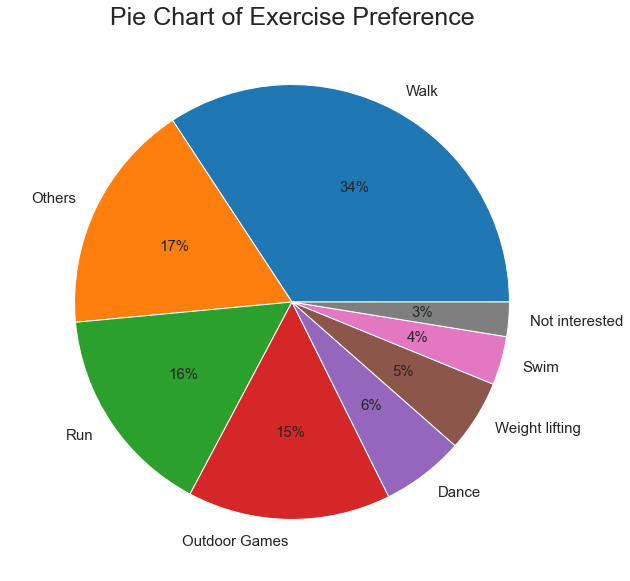

In [64]:
#Fig 7.1 : Pie Chart of Exercise Preference........................................................
fig7 = exercises_freq.plot.pie(figsize=(10,10),autopct='%.0f%%',fontsize = 15)
plt.title("Pie Chart of Exercise Preference",fontsize = 25)
plt.ylabel(" ")

In [45]:
# Data for fig 7.2
rows_with_walk_exercise=data[data.exercise.str.contains('Walk')]
#print(rows_with_walk_exercise)

Text(0.5, 1.0, 'Density of Walkers Age')

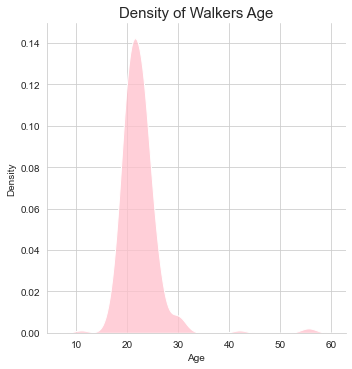

In [61]:
#Fig 7.2 : Density of Walkers Age..................................................................
fig7_2 = sns.displot(data=data,x='age',multiple="stack",kind="kde",color="pink")
fig7_2.set_axis_labels('Age','Density')
plt.title("Density of Walkers Age",fontsize = 15)

In [19]:
# Fig 8


Text(0.5, 1.0, 'Bar Chart of Rating of this study \n (Grouped by gender)')

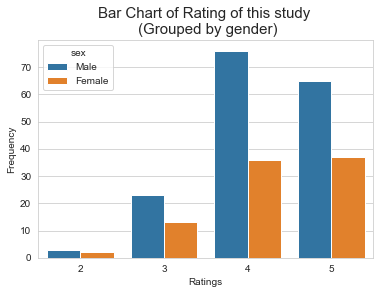

In [62]:
# Fig 9 : Bar Chart of Rating of this study (Grouped by gender) ....................................

fig9= sns.countplot(data=data,x='rate',hue='sex')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Bar Chart of Rating of this study \n (Grouped by gender)",fontsize = 15)



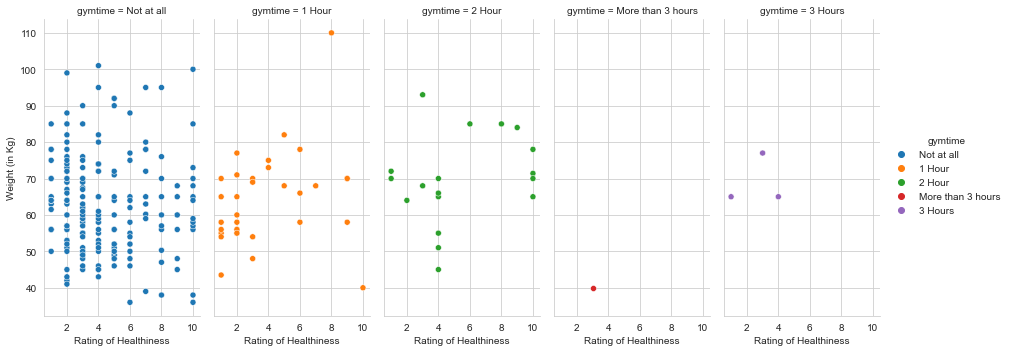

In [21]:
# Fig 10: Rating of Healthiness.............................................................
fig10 =sns.relplot(data=data,x= 'phy_health',y='weight',col='gymtime',hue='gymtime',aspect=0.5)
fig10.set_axis_labels('Rating of Healthiness','Weight (in Kg)')

In [22]:
# Cannot Understand

C:\Users\Ujjwa\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


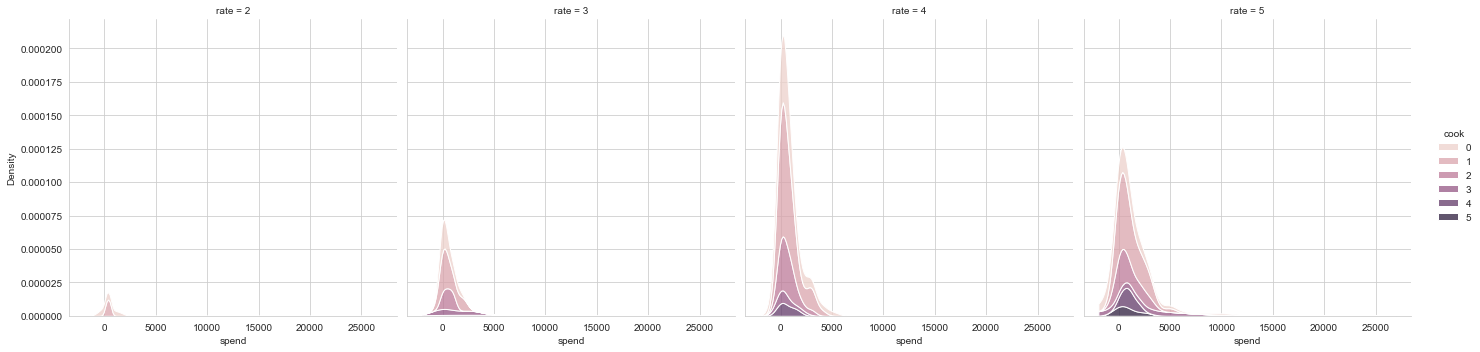

In [23]:
# Fig 4
fig4 = sns.displot(data=data,x='spend',multiple="stack",kind="kde",col='rate',hue='cook')

Text(0.5, 1.0, 'Fondness of Fast-Food and Healthiness')

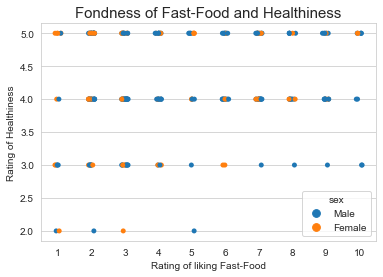

In [24]:
#Fig 8.1
fig8b= sns.stripplot(x='phy_ff',y='rate',data=data,hue='sex')
plt.xlabel("Rating of liking Fast-Food")
plt.ylabel("Rating of Healthiness")
plt.title("Fondness of Fast-Food and Healthiness",fontsize = 15)

Text(0.5, 1.0, 'Fondness of Fast-Food and Healthiness')

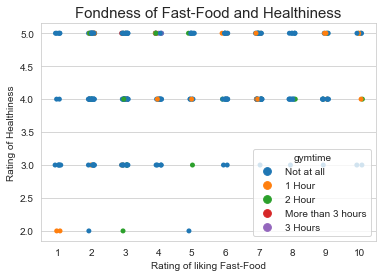

In [25]:
# Fig 8.2 Trial 1
fig8_a= sns.stripplot(x='phy_ff',y='rate',data=data,hue='gymtime')
plt.xlabel("Rating of liking Fast-Food")
plt.ylabel("Rating of Healthiness")
plt.title("Fondness of Fast-Food and Healthiness",fontsize = 15)

Text(0.5, 1.0, 'Fondness of Fast-Food and Healthiness')

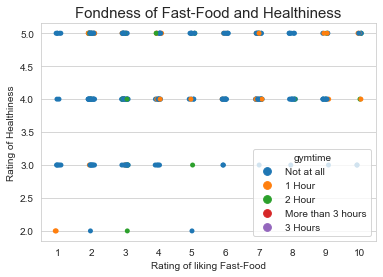

In [26]:
# Fig 8.2 Trial 2

fig8b= sns.stripplot(x='phy_ff',y='rate',data=data,hue='gymtime')
plt.xlabel("Rating of liking Fast-Food")
plt.ylabel("Rating of Healthiness")
plt.title("Fondness of Fast-Food and Healthiness",fontsize = 15)

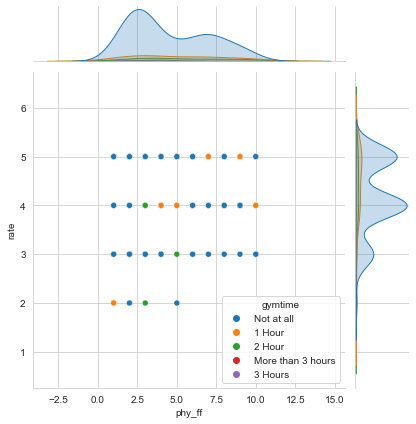

In [27]:
# Fig 8.2 Trial 3
fig8c=sns.jointplot(x='phy_ff',y='rate',hue='gymtime',data=data)